<a href="https://colab.research.google.com/github/lioradopacio/DataMining_EmotionClassification/blob/main/Data_minning_%2B_Classifica%C3%A7%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Avisos
import warnings
warnings.filterwarnings('ignore')

#configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn-darkgrid')

#Libs
import re #REGEX
import nltk #NLP

In [5]:
#base de dados
base_dados = pd.read_csv('/content/Tweets_Mg.csv')

#dimensões - total de linhas e colunas
base_dados.shape

(8199, 26)

In [6]:
#verficação
base_dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **MODELAGEM & EDA**

### CAMPOS NULOS

In [7]:
#verificando dados nulos
base_dados.isnull().sum()

Unnamed: 0                      0
Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Observação                   8198
Unnamed: 10                  8199
Unnamed: 11                  8199
Unnamed: 12                  8199
Unnamed: 13                  8199
Unnamed: 14                  8199
Unnamed: 15                  8199
Unnamed: 16                  8199
Unnamed: 17                  8199
Unnamed: 18                  8199
Unnamed: 19                  8199
Unnamed: 20                  8199
Unnamed: 21                  8199
Unnamed: 22                  8199
Unnamed: 23                  8199
Unnamed: 24                  8199
dtype: int64

In [8]:
#verificando as colunas
base_dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [9]:
#extraindo colunas nulas
colunas_extrair = base_dados.columns[10:]
base_dados.drop(columns=colunas_extrair, inplace=True)

In [10]:
#confirmando extração
base_dados.shape

(8199, 10)

In [11]:
#verificando campos únicos
base_dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [12]:
#removendo index e confirmando extração
base_dados.drop(columns= 'Unnamed: 0', inplace=True)
base_dados.shape

(8199, 9)

In [13]:
base_dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [14]:
#informações sobre a base de dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


### AJUSTANDO COLUNA DATA

In [15]:
#importando função para transformar coluna data
from dateutil.parser import parse

In [16]:
#função para converter data

def ajustar_data (Data):
  texto_data = Data
  transformação = parse(texto_data)
  Data_formatada = transformação.date()
  return Data_formatada

#atribuindo função a nova coluna de data
base_dados['Data_formatada'] = base_dados['Created At'].apply(ajustar_data)

#cinco primeiras linhas e a partir da 5a coluna
base_dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_formatada
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,Wândell,klefnews,0,Neutro,2017-01-08
2,Wândell,klefnews,0,Neutro,2017-01-08
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,Emily,Milly777,0,Negativo,2017-01-09


In [17]:
#outra forma de converter data (mais resumida)
base_dados['Created At'].apply( lambda Texto: parse(Texto).date())


0       2017-01-08
1       2017-01-08
2       2017-01-08
3       2017-01-04
4       2017-01-09
           ...    
8194    2017-02-09
8195    2017-02-09
8196    2017-02-09
8197    2017-02-09
8198    2017-02-07
Name: Created At, Length: 8199, dtype: object

In [18]:
#separando meses, anos e dias
base_dados['Data_formatada'] = pd.to_datetime(base_dados['Data_formatada'])

#Extraindo os dados
base_dados['Ano'] = base_dados['Data_formatada'].dt.year
base_dados['Mes'] = base_dados['Data_formatada'].dt.month
base_dados['Dia'] = base_dados['Data_formatada'].dt.day

base_dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_formatada,Ano,Mes,Dia
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [19]:
#meses em que mais teve comentários
base_dados.groupby(by=['Ano', 'Mes']).agg(
    Quantidade = ('Username', 'count')
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          7073
     2          1123

###AJUSTANDO GEOLOCALIZAÇÃO

In [20]:
#filtrando dados não nulos
Analise_geo = base_dados.loc[
  (base_dados['Geo Coordinates.latitude'].notnull()) &
  (base_dados['Geo Coordinates.longitude'].notnull())
]

Analise_geo.shape

(104, 13)

In [21]:
#verificando dados
Analise_geo.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_formatada,Ano,Mes,Dia
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
105,Fri Jan 06 13:31:11 +0000 2017,#road #trip #mg #car #gopro @ Governador Valad...,-41.933300,-18.850000,Brasil,Heliel Braga,helielbraga,0,Neutro,2017-01-06,2017,1,6
302,Fri Jan 06 00:10:47 +0000 2017,"��❤️ @ Governador Valadares, Minas Gerais http...",-41.933300,-18.850000,Snap: duraoluiza,Luiza�,LuizaFarias9,0,Neutro,2017-01-06,2017,1,6
607,Tue Jan 10 10:47:26 +0000 2017,"bom dia! (@ LFG in Governador Valadares, Minas...",-41.940796,-18.860655,"Minas, Brasil",snap: brunolasco ♎,brunolasco,0,Neutro,2017-01-10,2017,1,10


In [22]:
#agrupar geolocalizações
Analise_localização = Analise_geo.groupby (by = ['Geo Coordinates.latitude', 'Geo Coordinates.longitude']).count()[['Username']].reset_index()

#renomeando colunas 
Analise_localização.columns = ['Lat', 'Long', 'Quantidade']

Analise_localização.head()

,Lat,Long,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [23]:
#plot dos dados de localização 
px.density_mapbox(
    #dados
    Analise_localização,
    #latidide
    lat ='Lat',
    #longitude
    lon = 'Long',
    #quantidade
    z = 'Quantidade',
    #estilo do mapa
    mapbox_style = 'stamen-terrain',
    #centralização 
    center = dict(lat = 23.700, lon = -46.555),
    #zona do mapa
    zoom = 3,
    #circulo
    radius = 30

)

#o erro da localização no mapa quer dizer que as lat e long da base de dados
# estão incorretas, sendo assim essas informações não podem ser usadas


In [24]:
base_dados['User Location'].head(20)

0                             Brasil
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5         Um Outro Mundo É Possível 
6                                NaN
7             Belo Horizonte, Brasil
8                                NaN
9                Belo Horizonte - MG
10      error 404 location not found
11              Minas Gerais, Brasil
12    Santo Antônio do Monte, Brasil
13                            BRASIL
14                               NaN
15            San Pedro Garza García
16                               NaN
17            Belo Horizonte, Brasil
18          Belo Horizonte MG Brasil
19          Belo Horizonte/MG/Brasil
Name: User Location, dtype: object

In [25]:
#intalando geopy
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#importando a biblioteca
from geopy.geocoders import Nominatim

In [27]:
#instaciando a função 
inst_funcao = Nominatim(user_agent = 'Getloc')

In [28]:
#função útil quando temos apenas o nome, mas não temos as coordenadas geográficas
print(f'Local: {inst_funcao.geocode("Brasil").address}')
print(f'Latitude: {inst_funcao.geocode("Brasil").latitude}')
print(f'Longitude: {inst_funcao.geocode("Brasil").longitude}')

Local: Brasil
Latitude: -10.3333333
Longitude: -53.2


In [29]:
#analise de representatividade em porcentagem
#cumsum() soma do acumulado
base_dados ['User Location'].value_counts(normalize = True).cumsum()

Brasil                           0.107670
Minas Gerais                     0.172163
Belo Horizonte - Minas Gerais    0.214793
Belo Horizonte, Brasil           0.256149
Belo Horizonte                   0.280015
                                   ...   
SABARÁ-MG                        0.999271
SABARÁ MG                        0.999453
João Monlevade, Brasil           0.999636
zimbabwe                         0.999818
Brasil - Angola - Portugal       1.000000
Name: User Location, Length: 1591, dtype: float64

In [30]:
#transformando em tabela
Analise_local = base_dados ['User Location'].value_counts(normalize = True).cumsum().reset_index()

Analise_local.head()

,index,User Location
0,Brasil,0.107670
1,Minas Gerais,0.172163
2,Belo Horizonte - Minas Gerais,0.214793
3,"Belo Horizonte, Brasil",0.256149
4,Belo Horizonte,0.280015


In [31]:
#filtrando dados até 50%
Analise_local = Analise_local.loc[Analise_local['User Location'] < 0.55]

#trocando nomes colunas
Analise_local.columns = ['Local', '%']

Analise_local.head()

,Local,%
0,Brasil,0.107670
1,Minas Gerais,0.172163
2,Belo Horizonte - Minas Gerais,0.214793
3,"Belo Horizonte, Brasil",0.256149
4,Belo Horizonte,0.280015


In [32]:
#verificando dimensões
Analise_local.shape

(64, 2)

In [33]:
#calculando a quantidade
Quantidade = base_dados['User Location'].value_counts().reset_index()

#renomeando colunas
Quantidade.columns = ['Local', 'Quantidade']

Quantidade.head()

,Local,Quantidade
0,Brasil,591
1,Minas Gerais,354
2,Belo Horizonte - Minas Gerais,234
3,"Belo Horizonte, Brasil",227
4,Belo Horizonte,131


In [34]:
#merge nas duas ultimas tabelas criadas
Tab_localizacao = pd.merge(Analise_local, Quantidade, on=['Local'], how = 'inner' )

Tab_localizacao.head()

,Local,%,Quantidade
0,Brasil,0.107670,591
1,Minas Gerais,0.172163,354
2,Belo Horizonte - Minas Gerais,0.214793,234
3,"Belo Horizonte, Brasil",0.256149,227
4,Belo Horizonte,0.280015,131


In [35]:
#verificando valores únicos
Tab_localizacao['Local'].unique()

array(['Brasil', 'Minas Gerais', 'Belo Horizonte - Minas Gerais',
       'Belo Horizonte, Brasil', 'Belo Horizonte', 'Brazil',
       'São Paulo, Brasil', 'Rio de Janeiro, Brasil',
       'Belo Horizonte MG Brasil', 'São Paulo', 'Minas Gerais, Brasil',
       'Guarulhos - SP', 'Rio de Janeiro', 'São Joquim de Bicas',
       'Brasília, Brasil', 'Brasil Natal/RN', '-16.683649,-49.268102',
       'Babilonia', 'Rio de Janeiro, Brazil',
       'Fortaleza - Ceará - Brazil', 'WorldWide', 'Manaus-Amazonas',
       'BRASIL', 'Belo Horizonte, Minas Gerais', 'Rio de Janeiro, RJ',
       'Belo Horizonte - MG', 'Ouro Preto - MG Brasil',
       'Governador Valadares', 'Belo Horizonte/MG', 'Hollywood, CA',
       'Minas Gerais - Brasil', 'Sorocaba, Brasil',
       'Governador Valadares, Brasil', 'No coração das Minas Gerais ',
       'brasil', 'Vitória - ES, Brasil', 'Pará de Minas / MG',
       'República de Curitiba', 'Belo Horizonte, MG',
       'Belo Horizonte/Minas Gerais', ' ',
       'Florianó

In [36]:
#incluindo geolocalização

Tab_localizacao ['Latitude'] = None
Tab_localizacao ['Longitude'] = None

#loop
for loop in range(0, len(Tab_localizacao['Local'])):
  #tenta localizar a informação sobre o local
  try:
    Local = inst_funcao.geocode(Tab_localizacao['Local'][loop])
  except:
    pass
  
  #se tiver o Local ele atribui latitude e longitude, se não pass
  if Local != None:
    Tab_localizacao['Latitude'][loop] = Local.latitude
    Tab_localizacao['Longitude'][loop] = Local.longitude

#print(loop)

In [37]:
#agora a tabela contém os valores corretos de lat e lon
Tab_localizacao.head()

,Local,%,Quantidade,Latitude,Longitude
0,Brasil,0.107670,591,-10.333333,-53.2
1,Minas Gerais,0.172163,354,-18.526484,-44.158865
2,Belo Horizonte - Minas Gerais,0.214793,234,-19.922732,-43.945095
3,"Belo Horizonte, Brasil",0.256149,227,-19.922732,-43.945095
4,Belo Horizonte,0.280015,131,-19.922732,-43.945095


In [42]:
#plot dos dados de localização 
px.density_mapbox(
    #dados
    Tab_localizacao,
    #latidide
    lat ='Latitude',
    #longitude
    lon = 'Longitude',
    #quantidade
    z = 'Quantidade',
    #estilo do mapa
    mapbox_style = 'stamen-terrain',
    #centralização 
    center = dict(lat = 23.700, lon = -46.555),
    #zona do mapa
    zoom = 3,
    #circulo
    radius = 30

)

##ANÁLISE DE OUTRAS VARIÁVEIS




In [39]:
#Usuários
base_dados['Username'].value_counts()

POLÍCIA MILITAR MG      297
Daniel Araujo #beta     124
Hugo TIMBETA            100
Camila Maciel Serrão     91
Raynniere Makepeace      77
                       ... 
Russo Guedes              1
LUCIANO-LUMOTOKA          1
Hilton Vilar              1
tina thom                 1
Pornografia Destrói       1
Name: Username, Length: 3907, dtype: int64

In [40]:
#Usuários (@ do usuário)
base_dados['User Screen Name'].value_counts()

pmmg190            297
danaraujjobeta     124
Hugotim1           100
CamilaMacielSer     91
itsRaynniere        77
                  ... 
gcvascon             1
ClaudioHirakawa      1
SeleneSCW            1
MarcusMartinho       1
porndestroi          1
Name: User Screen Name, Length: 3966, dtype: int64

In [59]:
#retweets
base_dados['Retweet Count'].value_counts(normalize= True).head()

0      0.549091
1      0.072692
2      0.037444
444    0.036590
3      0.021100
Name: Retweet Count, dtype: float64

##ANÁLISE DA CLASSIFICAÇÃO

In [60]:
base_dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [61]:
#instalando YellowBrick na máquina
!pip install YellowBrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


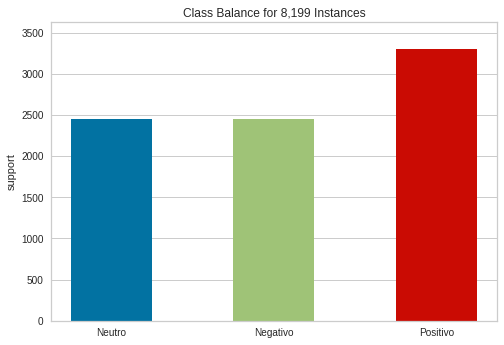

In [62]:
#importando o YellowBrick e o balanço
#Yellowbrick voltado para visualização de machine learning
from yellowbrick import ClassBalance

#instanciando
grafico_balanco = ClassBalance( labels = ['Neutro', 'Negativo', 'Positivo'])
grafico_balanco.fit(base_dados['Classificacao'])
grafico_balanco.show();

In [63]:
#avaliando o balanço da classe usando Plot com porcentagens
anl_valores = base_dados['Classificacao'].value_counts()

#plotly
grafico_anl_valores = go.Figure(
    go.Funnelarea(
        text = anl_valores.index,
        values = anl_valores.values,
        title = {'text': 'Distribuição dos Sentimentos', 'position': 'top center'}
    )
)

#mostrando o gráfico
grafico_anl_valores.show()

### QUANTIDADE DE PALAVRAS

In [64]:
#quantidade de palavras
#função para calcular o tamanho 
def quantidade_palavras (texto):
  fatiando = texto.split()
  quantidade = len(fatiando)
  return quantidade

#aplicando a função a nova coluna 
base_dados['Quantidade_palavras'] = base_dados['Text'].apply(quantidade_palavras)

#verificando
base_dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_formatada,Ano,Mes,Dia,Quantiade_palavras,Quantidade_palavras
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8,10,10
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7,7
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7,7
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4,2,2
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9,20,20


In [66]:
#analisando a coluna recém criada
base_dados['Quantidade_palavras'].describe()

count    8199.000000
mean       16.141115
std         4.280192
min         1.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        32.000000
Name: Quantidade_palavras, dtype: float64

In [67]:
#plotando
px.box(base_dados, x='Classificacao', y = 'Quantidade_palavras', color='Classificacao', title='Quantidade de Palavras por Sentimento')

Analisando o gráfico é possível entender que quando uma pessoa ser expressa de forma negativa, ela utiliza uma maior quantidade de palavras. 
Já quando ela se expressa positivamente, ela utiliza uma menor quantidade de palavras. Ou seja, inversamente proporcionais.

### NUVEM DE PALAVRAS

In [68]:
#instalando 
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
#Função para numvem de cloud
from wordcloud import WordCloud

In [74]:
#criando uma wordcloud
#cocatenando texto em uma unica string
concat = ''

#loop no texto
for Loop in base_dados['Text']:

  #loop para concatenar
  for Palavra in Loop.split():
    #pegando cada palvra e colocando dentro da variável
    concat = concat + ' ' + Palavra

print(f'Quantidade de palavras concatenadas {len(concat)}')

Quantidade de palavras concatenadas 961415


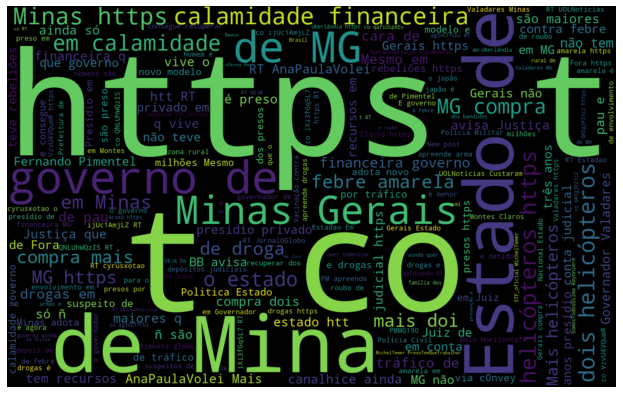

In [76]:
#plotando

#instanciando a nuvem de palavras
nuvem_palavras = WordCloud(width=1600, height=1000).generate(concat)

#tamanho
figura, eixo = plt.subplots(figsize=(15,7))
#plot
eixo.imshow(nuvem_palavras, interpolation ='bilinear')
#desativa os grids
eixo.set_axis_off()

In [84]:
#ajuste dos textos

Palavras_positivas = ''
Palavras_negativas = ''
Palavras_neutras = ''

#loop
for Sentimento in base_dados['Classificacao'].unique():
  
  #Analise Sentimento positivo
    if Sentimento == 'Positivo':
      Filtro = base_dados.loc[base_dados['Classificacao'] == Sentimento]
      
      #loop para concatenar
      for Palavra in Filtro['Text']:
         for fatiando in Palavra.split():
           Palavras_positivas = Palavras_positivas + ' ' + fatiando
  
  #Analise Sentimento negativo
    elif Sentimento == 'Negativo':
      Filtro = base_dados.loc[base_dados['Classificacao'] == Sentimento]
      
      #loop para concatenar
      for Palavra in Filtro['Text']:
         for fatiando in Palavra.split():
           Palavras_negativas = Palavras_negativas + ' ' + fatiando

  #Analise Sentimento neutro
    else:
      Filtro = base_dados.loc[base_dados['Classificacao'] == Sentimento]
      
      #loop para concatenar
      for Palavra in Filtro['Text']:
         for fatiando in Palavra.split():
           Palavras_neutras = Palavras_neutras + ' ' + fatiando

print('Quantidade de palavras: \n',
      f'Positivo: {len(Palavras_positivas)}\n',
      f'Negativo: {len(Palavras_negativas)}\n',
      f'Neutro: {len(Palavras_neutras)}')

Quantidade de palavras: 
 Positivo: 374456
 Negativo: 307576
 Neutro: 279383


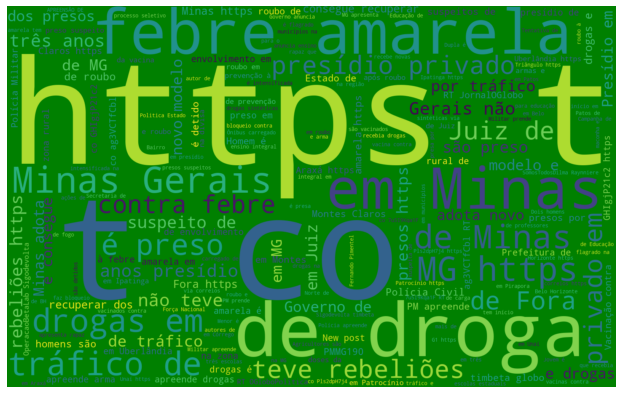

In [85]:
#Nuvem de palavras sentimento positivo

#instanciando a nuvem de palavras
nuvem_palavras = WordCloud(width=1600, height=1000, background_color='green').generate(Palavras_positivas)

#tamanho
figura, eixo = plt.subplots(figsize=(15,7))
#plot
eixo.imshow(nuvem_palavras, interpolation ='bilinear')
#desativa os grids
eixo.set_axis_off()

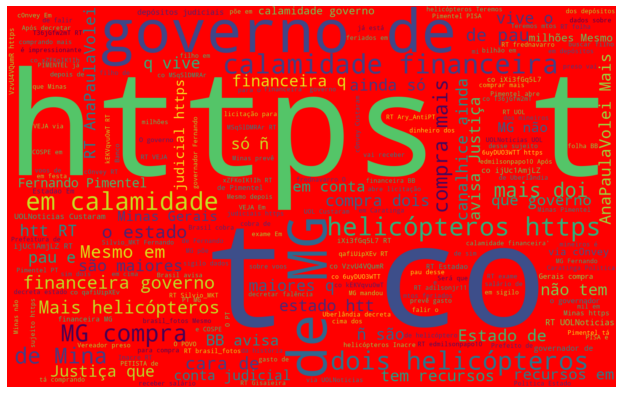

In [86]:
#Nuvem de palavras sentimento negativo

#instanciando a nuvem de palavras
nuvem_palavras = WordCloud(width=1600, height=1000, background_color='red').generate(Palavras_negativas)

#tamanho
figura, eixo = plt.subplots(figsize=(15,7))
#plot
eixo.imshow(nuvem_palavras, interpolation ='bilinear')
#desativa os grids
eixo.set_axis_off()

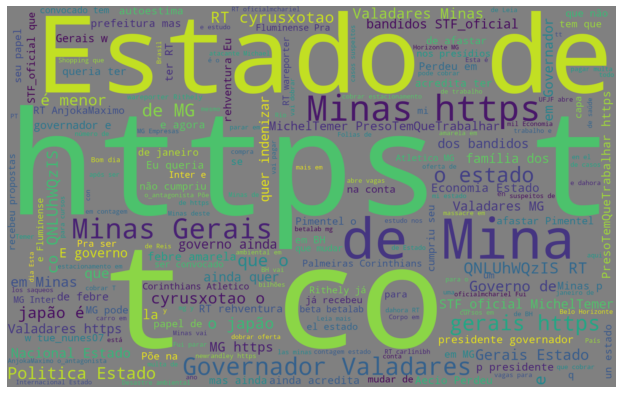

In [87]:
#Nuvem de palavras sentimento negativo

#instanciando a nuvem de palavras
nuvem_palavras = WordCloud(width=1600, height=1000, background_color='grey').generate(Palavras_neutras)

#tamanho
figura, eixo = plt.subplots(figsize=(15,7))
#plot
eixo.imshow(nuvem_palavras, interpolation ='bilinear')
#desativa os grids
eixo.set_axis_off()